Edge Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt

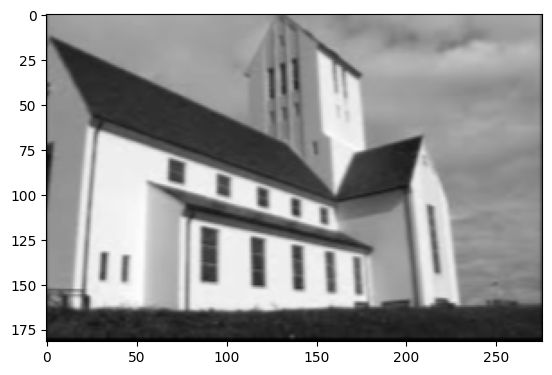

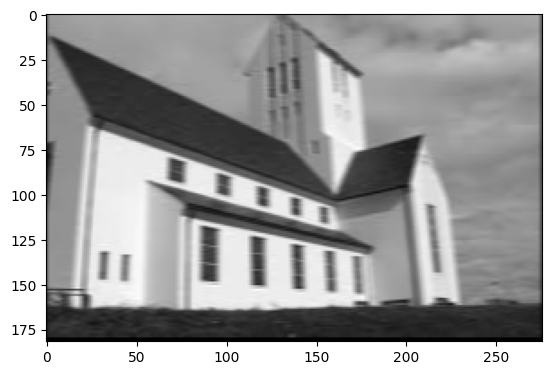

In [3]:
"""
    Implement convolution process of smoothing Image 1 with a 5 x 5 Gaussian Filter
    with 𝜎 = 1 𝑎𝑛𝑑 2 , plot the corresponding output images.
"""
def gaussian_kernel(size, sigma):
    """ computes the gaussian kernel """
    kernel = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = i - (size // 2)
            y = j - (size // 2)
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
        kernel /= (2 * np.pi * sigma**2)
    return kernel / kernel.sum()

def convolve(image, kernel):
    """ convolves image against kernel """
    height, width = kernel.shape
    padded_image = np.pad(image, ((height//2, height//2), (width//2, width//2)), mode='constant')

    res = np.zeros_like(image)

    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            res[y, x] = np.sum(kernel * padded_image[y:y+height, x:x+width])
    return res

image = plt.imread('image1.png')
if image.ndim == 3:
    image = image[:, :, 0]

kernel_1 = gaussian_kernel(5,1)
kernel_2 = gaussian_kernel(5, 2)
smoothed_image_1 = convolve(image, kernel_1)
smoothed_image_2 = convolve(image, kernel_2)
plt.imshow(smoothed_image_1, cmap='gray')
plt.figure()
plt.imshow(smoothed_image_2, cmap='gray')
plt.show()

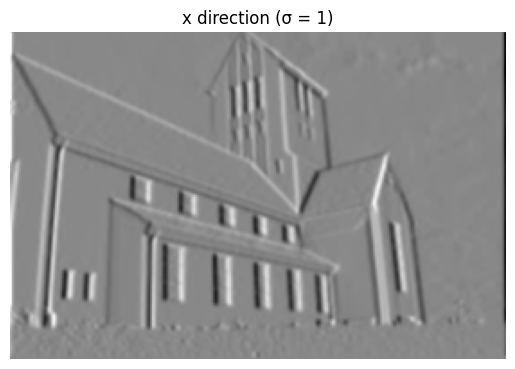

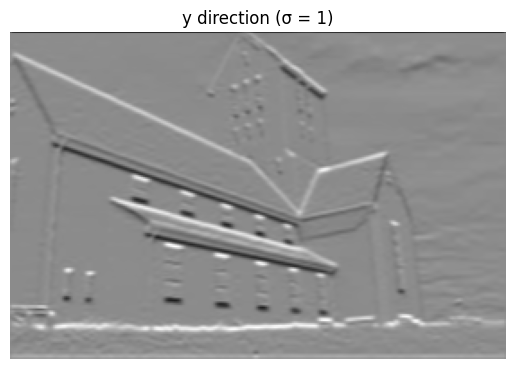

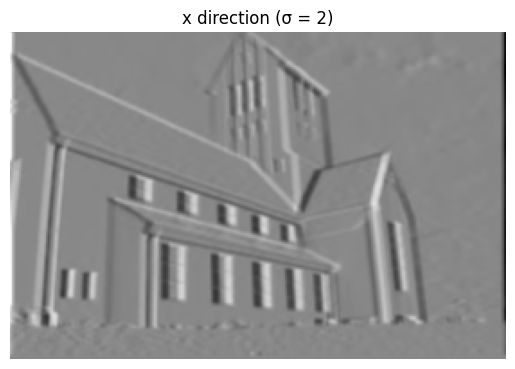

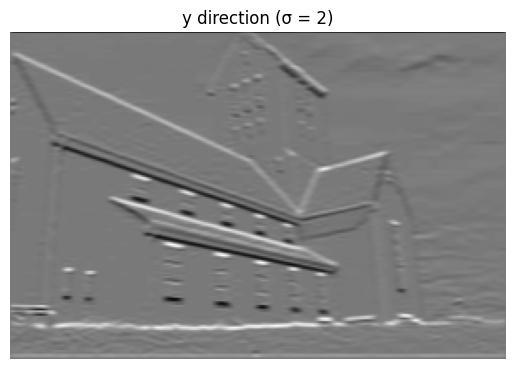

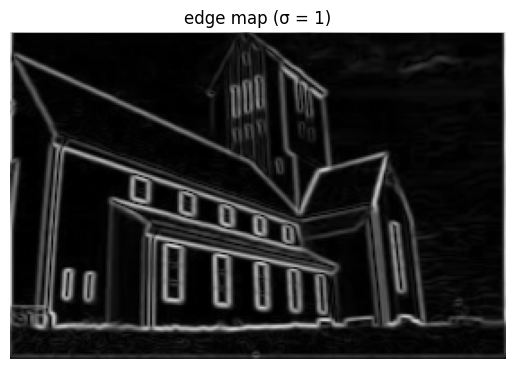

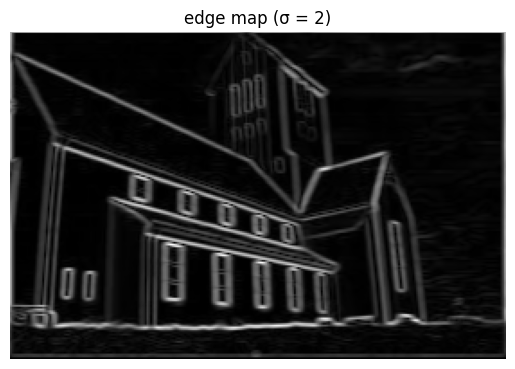

In [7]:
"""
    Implement convolution process of convolving a 3 x 3 Sobel filters (𝑆_𝑥 𝑎𝑛𝑑 𝑆_𝑦)
    with the output images you obtained in step 1.
    Plot the outputs of each step and the final edge map which combines edges in x and y directions
"""

S_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
S_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

x_edges_1 = convolve(smoothed_image_1, S_x)
y_edges_1 = convolve(smoothed_image_1, S_y)
x_edges_2 = convolve(smoothed_image_2, S_x)
y_edges_2 = convolve(smoothed_image_2, S_y)

edges_1 = np.sqrt(x_edges_1**2 + y_edges_1**2)
edges_2 = np.sqrt(x_edges_2**2 + y_edges_2**2)

plt.imshow(x_edges_1, cmap='gray')
plt.title('x direction (σ = 1)')
plt.axis('off')
plt.show()

plt.imshow(y_edges_1, cmap='gray')
plt.title('y direction (σ = 1)')
plt.axis('off')
plt.show()

plt.imshow(x_edges_2, cmap='gray')
plt.title('x direction (σ = 2)')
plt.axis('off')
plt.show()

plt.imshow(y_edges_2, cmap='gray')
plt.title('y direction (σ = 2)')
plt.axis('off')
plt.show()

plt.imshow(edges_1, cmap='gray')
plt.title('edge map (σ = 1)')
plt.axis('off')
plt.show()

plt.imshow(edges_2, cmap='gray')
plt.title('edge map (σ = 2)')
plt.axis('off')
plt.show()

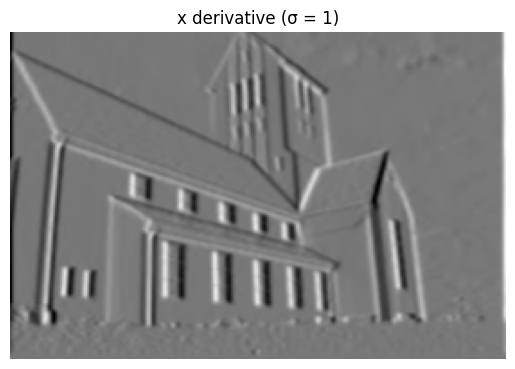

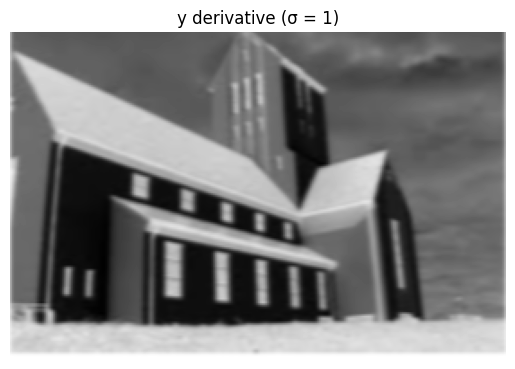

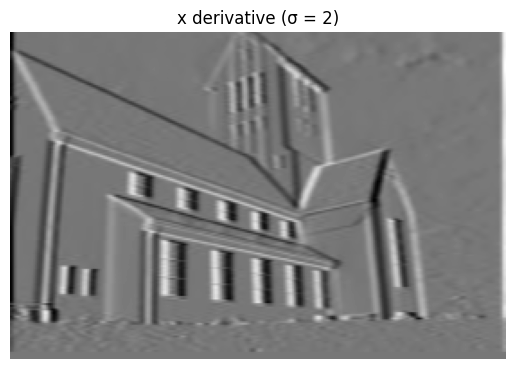

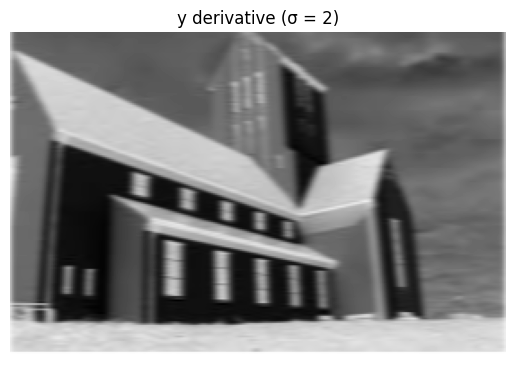

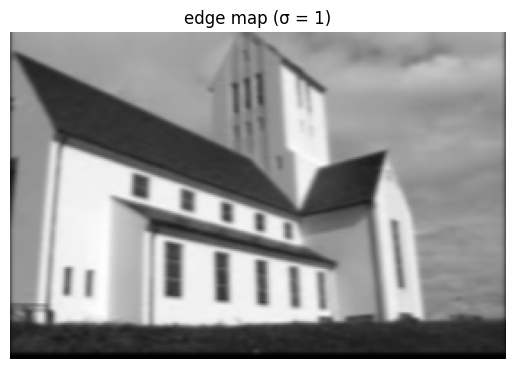

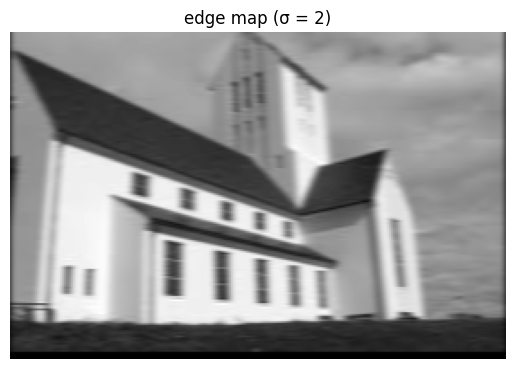

In [8]:
"""
    Implement convolution process of convolving Image 1 with the derivative filters.
    5 x 5 filters and for 𝜎 = 1 𝑎𝑛𝑑 2 , and plot the outputs of each step
    and the final edge map which combines edges in x and y directions
"""

def gaussian_derivative_kernel(size, sigma, axis):
    kernel = gaussian_kernel(size, sigma)
    derivative = np.zeros_like(kernel)
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            if axis == 'x':
                derivative[i, j] = -(j - (size//2)) * kernel[i, j]
            elif axis == 'y':
                derivative[i, j] = -(i - (size//2)) * kernel[i, j]
    return derivative / sigma**2

x_deriv_1 = gaussian_derivative_kernel(5, 1, 'x')
x_deriv_2 = gaussian_derivative_kernel(5, 2, 'x')
y_deriv_1 = gaussian_derivative_kernel(5, 1, 'y')
y_deriv_2 = gaussian_derivative_kernel(5, 2, 'y')

x_edges_1 = convolve(smoothed_image_1, x_deriv_1)
y_edges_1 = convolve(smoothed_image_1, y_deriv_1)
x_edges_2 = convolve(smoothed_image_2, x_deriv_2)
y_edges_2 = convolve(smoothed_image_2, y_deriv_2)

edges_1 = np.sqrt(x_edges_1**2 + y_edges_1**2)
edges_2 = np.sqrt(x_edges_2**2 + y_edges_2**2)

plt.imshow(x_edges_1, cmap='gray')
plt.title('x derivative (σ = 1)')
plt.axis('off')
plt.show()

plt.imshow(y_edges_1, cmap='gray')
plt.title('y derivative (σ = 1)')
plt.axis('off')
plt.show()

plt.imshow(x_edges_2, cmap='gray')
plt.title('x derivative (σ = 2)')
plt.axis('off')
plt.show()

plt.imshow(y_edges_2, cmap='gray')
plt.title('y derivative (σ = 2)')
plt.axis('off')
plt.show()

plt.imshow(edges_1, cmap='gray')
plt.title('edge map (σ = 1)')
plt.axis('off')
plt.show()

plt.imshow(edges_2, cmap='gray')
plt.title('edge map (σ = 2)')
plt.axis('off')
plt.show()

Harris Corner Detection Algorithm

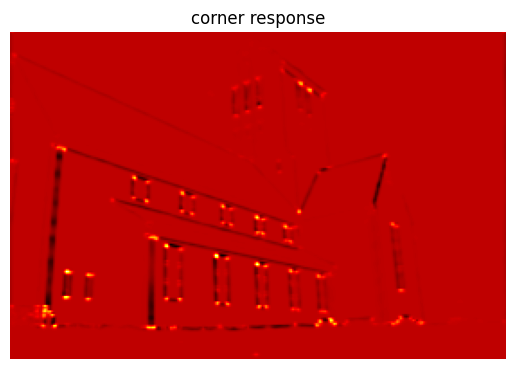

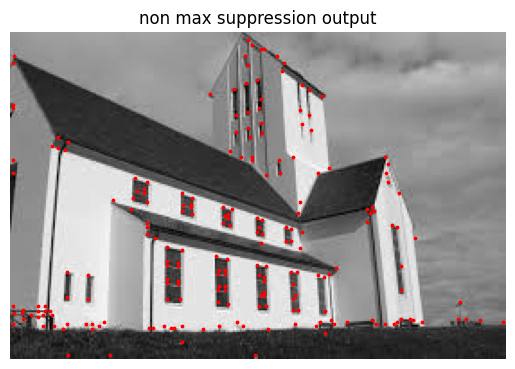

In [9]:
"""
    Harris corner detection algorithm
    1. color to grayscale
    2. spatial derivative calculation
    3. structure tensor setup (M)
    4. corner response calculation
    5. non-maximum suppression
"""

def harris_corner_detection(image, sigma=1, k=0.05, threshold=0.01):
    # grayscale
    if image.ndim == 3:
        image = np.mean(image, axis=2)

    # spatial derivative calculation
    I_x = convolve(image, S_x)
    I_y = convolve(image, S_y)

    # tensor setup
    Ixx = I_x**2
    Iyy = I_y**2
    Ixy = I_x * I_y

    kernel = gaussian_kernel(5, sigma)

    Sxx = convolve(Ixx, kernel)
    Syy = convolve(Iyy, kernel)
    Sxy = convolve(Ixy, kernel)

    # corner response calculation
    det = (Sxx * Syy) - (Sxy**2)
    trace = Sxx + Syy
    r = det - k * (trace**2)

    # non-maximum suppression
    corner = np.zeros_like(r)
    for i in range(1, r.shape[0] - 1):
        for j in range(1, r.shape[1] - 1):
            if r[i, j] > threshold:
                cur = r[i - 1:i + 2,j - 1:j + 2]
                if r[i, j] == np.max(cur):
                    corner[i, j] = 1
    return r, corner

r, corner = harris_corner_detection(image, sigma=1, k=0.05, threshold=0.01)

plt.imshow(r, cmap='hot')
plt.title('corner response')
plt.axis('off')
plt.show()

plt.imshow(image, cmap='gray')
plt.scatter(np.nonzero(corner)[1], np.nonzero(corner)[0], c='r', s=3)
plt.title('non max suppression output')
plt.axis('off')
plt.show()